# begin

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [2]:
sess = tf.Session()

In [3]:
my_tensor = tf.zeros([1,20])

In [4]:
print(my_tensor)

Tensor("zeros:0", shape=(1, 20), dtype=float32)


In [5]:
sess.run(my_tensor)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

In [6]:
my_var = tf.Variable(tf.zeros([1,20]), name = 'my_var')

In [7]:
sess.run(my_var.initializer)
sess.run(my_var)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

In [8]:
row_dim = 2
col_dim = 3

In [9]:
zero_var = tf.Variable(tf.zeros([row_dim, col_dim]))
ones_var = tf.Variable(tf.ones([row_dim, col_dim]))

In [10]:
sess.run(zero_var.initializer)
sess.run(ones_var.initializer)
sess.run(zero_var)
print(sess.run(ones_var))

[[1. 1. 1.]
 [1. 1. 1.]]


In [11]:
zero_similar = tf.Variable(tf.zeros_like(zero_var))
ones_similar = tf.Variable(tf.ones_like(ones_var))

sess.run(ones_similar.initializer)
sess.run(zero_similar.initializer)
print(sess.run(ones_similar))
print(sess.run(zero_similar))

[[1. 1. 1.]
 [1. 1. 1.]]
[[0. 0. 0.]
 [0. 0. 0.]]


In [12]:
type(zero_similar)

tensorflow.python.ops.variables.Variable

In [13]:
fill_var = tf.Variable(tf.fill([row_dim, col_dim], -1))
sess.run(fill_var.initializer)
print(sess.run(fill_var))

[[-1 -1 -1]
 [-1 -1 -1]]


In [14]:
# Create a variable from a constant
const_var = tf.Variable(tf.constant([8, 6, 7, 5, 3, 0, 9]))
# This can also be used to fill an array:
const_fill_var = tf.Variable(tf.constant(-1, shape=[row_dim, col_dim]))

sess.run(const_var.initializer)
sess.run(const_fill_var.initializer)

print(sess.run(const_var))
print(sess.run(const_fill_var))

[8 6 7 5 3 0 9]
[[-1 -1 -1]
 [-1 -1 -1]]


In [15]:
# Linspace in TensorFlow
linear_var = tf.Variable(tf.linspace(start=0.0, stop=1.0, num=10)) # Generates [0.0, 0.5, 1.0] includes the end

# Range in TensorFlow
sequence_var = tf.Variable(tf.range(start=6, limit=15, delta=2)) # Generates [6, 9, 12] doesn't include the end

sess.run(linear_var.initializer)
sess.run(sequence_var.initializer)

print(sess.run(linear_var))
print(sess.run(sequence_var))

[0.         0.11111111 0.22222222 0.33333334 0.44444445 0.5555556
 0.6666667  0.7777778  0.8888889  1.        ]
[ 6  8 10 12 14]


# Write log -> TensorBoard

In [16]:
# Reset graph
#ops.reset_default_graph()

# Start a graph session
#sess = tf.Session()

# Create variable
#my_var = tf.Variable(tf.zeros([1,20]))

# Add summaries to tensorboard
merged = tf.summary.merge_all()

# Initialize graph writer:
writer = tf.summary.FileWriter("/tmp/variable_logs", graph=sess.graph)

# Initialize operation
initialize_op = tf.global_variables_initializer()

# Run initialization of variable
sess.run(initialize_op)

# 1.3

In [17]:
x = tf.placeholder(tf.float32, shape=[4, 4])

In [18]:
# Input data to placeholder, note that 'rand_array' and 'x' are the same shape.
rand_array = np.random.rand(4, 4)

# Create a Tensor to perform an operation (here, y will be equal to x, a 4x4 matrix)
y = tf.identity(x)

# Print the output, feeding the value of x into the computational graph
print(sess.run(y, feed_dict={x: rand_array}))

[[0.11117361 0.5872779  0.8851264  0.23880892]
 [0.3542498  0.8754032  0.60625714 0.3408785 ]
 [0.8527433  0.31786346 0.27032363 0.54313785]
 [0.64770746 0.30615625 0.8924865  0.16795628]]


# 1.4

In [19]:
identity_matrix = tf.diag([1.0,1.0,1.0])
print(sess.run(identity_matrix)) #单位矩阵

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [20]:
A = tf.truncated_normal([2,3]) #截断正太分布
print(sess.run(A))

[[ 0.1706774   1.0248742   0.16605896]
 [-1.3971833   1.1409588  -0.88723415]]


In [21]:
B = tf.fill([2,3], 5.0)
print(sess.run(B))

[[5. 5. 5.]
 [5. 5. 5.]]


In [22]:
type(B)

tensorflow.python.framework.ops.Tensor

In [23]:
C = tf.random_uniform([3,2])
print(sess.run(C))

[[0.03029704 0.5016364 ]
 [0.84813046 0.6505033 ]
 [0.71721005 0.65953255]]


In [24]:
D = tf.convert_to_tensor(np.array([[1., 2., 3.], [-3., -7., -1.], [0., 5., -2.]]), dtype = float)
print(D)

Tensor("Const_2:0", shape=(3, 3), dtype=float32)


In [25]:
print(sess.run(A+B))
print(sess.run(B-B))

[[5.3494654 4.537175  4.622534 ]
 [4.6860347 4.8128924 3.6126099]]
[[0. 0. 0.]
 [0. 0. 0.]]


In [26]:
print(sess.run(tf.matmul( D,tf.matrix_inverse(D))))

[[1.0000000e+00 2.9802322e-08 1.4901161e-08]
 [1.4901161e-07 1.0000000e+00 1.2479722e-07]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00]]


In [27]:
print(sess.run(tf.transpose(B))) # 转置

[[5. 5.]
 [5. 5.]
 [5. 5.]]


In [28]:
print(sess.run(tf.matrix_determinant(D))) #行列式

-38.0


In [29]:
print(sess.run(tf.matrix_inverse(D))) #逆矩阵

[[-0.50000006 -0.5        -0.50000006]
 [ 0.15789475  0.05263158  0.21052633]
 [ 0.39473686  0.13157895  0.0263158 ]]


In [30]:
print(sess.run(tf.cholesky(identity_matrix))) #https://zh.wikipedia.org/wiki/Cholesky%E5%88%86%E8%A7%A3

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [31]:
eigenvalues, eigenvectors = sess.run(tf.self_adjoint_eig(D))
print(eigenvalues)
print(eigenvectors)

[-10.659076    -0.22750695   2.886583  ]
[[-0.21749546 -0.6325011  -0.74339646]
 [-0.84526515 -0.25879988  0.46749276]
 [ 0.48808062 -0.7300446   0.4783433 ]]


# 1.5 Operations

In [32]:
print(sess.run(tf.div(3,4)))
print(sess.run(tf.div(3.0,4)))
print(sess.run(tf.truediv(3,4)))
print(sess.run(tf.floordiv(3.0,4.0)))

0
0.75
0.75
0.0


In [33]:
print(sess.run(tf.mod(22.0,5.0)))

2.0


In [34]:
print(sess.run(tf.cross([1.,2.,3.],[0.,1.,0.])))

[-3.  0.  1.]


In [35]:
print(sess.run(tf.sin(3.1416)))
print(sess.run(tf.cos(3.1416)))
print(sess.run(tf.div(tf.sin(3.1416/4.), tf.cos(3.1416/4.))))

-7.2399803e-06
-1.0
1.0000036


In [36]:
test_nums = range(15)

def custom_polynomial(x_val):
    # Return 3x^2 - x + 10
    return(tf.subtract(3 * tf.square(x_val), x_val) + 10)

print(sess.run(custom_polynomial(11)))

362


In [37]:
expected_output = [3*x*x-x+10 for x in test_nums]
print(expected_output)

[10, 12, 20, 34, 54, 80, 112, 150, 194, 244, 300, 362, 430, 504, 584]


In [38]:
for num in test_nums:
    print(sess.run(custom_polynomial(num)))

10
12
20
34
54
80
112
150
194
244
300
362
430
504
584


# 1.6 Activation Functions

In [39]:
x_vals = np.linspace(start=-10., stop=10., num=100)

In [40]:
print(sess.run(tf.nn.relu([-3., 3., 10.])))
y_relu = sess.run(tf.nn.relu(x_vals))

[ 0.  3. 10.]


In [41]:
print(sess.run(tf.nn.relu6([-3., 3., 10.])))
y_relu6 = sess.run(tf.nn.relu6(x_vals))

[0. 3. 6.]


In [42]:
print(sess.run(tf.nn.sigmoid([-1., 0., 1.])))
y_sigmoid = sess.run(tf.nn.sigmoid(x_vals))

[0.26894143 0.5        0.7310586 ]


In [43]:
print(sess.run(tf.nn.tanh([-1., 0., 1.])))
y_tanh = sess.run(tf.nn.tanh(x_vals))

[-0.7615942  0.         0.7615942]


In [44]:
print(sess.run(tf.nn.softsign([-1., 0., 1.])))
y_softsign = sess.run(tf.nn.softsign(x_vals))

[-0.5  0.   0.5]


In [45]:
print(sess.run(tf.nn.softplus([-1., 0., 1.])))
y_softplus = sess.run(tf.nn.softplus(x_vals))

[0.31326166 0.6931472  1.3132616 ]


In [46]:
print(sess.run(tf.nn.elu([-1., 0., 1.])))
y_elu = sess.run(tf.nn.elu(x_vals))

[-0.63212055  0.          1.        ]


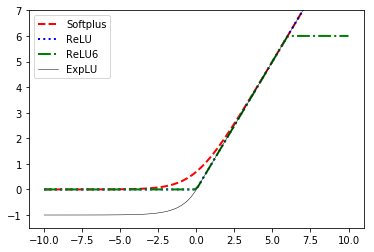

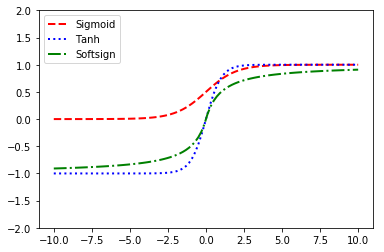

In [47]:
plt.plot(x_vals, y_softplus, 'r--', label='Softplus', linewidth=2)
plt.plot(x_vals, y_relu, 'b:', label='ReLU', linewidth=2)
plt.plot(x_vals, y_relu6, 'g-.', label='ReLU6', linewidth=2)
plt.plot(x_vals, y_elu, 'k-', label='ExpLU', linewidth=0.5)
plt.ylim([-1.5,7])
plt.legend()#loc='upper left')
plt.show()

plt.plot(x_vals, y_sigmoid, 'r--', label='Sigmoid', linewidth=2)
plt.plot(x_vals, y_tanh, 'b:', label='Tanh', linewidth=2)
plt.plot(x_vals, y_softsign, 'g-.', label='Softsign', linewidth=2)
plt.ylim([-2,2])
plt.legend(loc='upper left')
plt.show()

# Data Gathering

In [48]:
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris
from sklearn.datasets import load_iris

iris = load_iris()
print(len(iris.data))
print(len(iris.target))
print(iris.data[0])
print(set(iris.target))

150
150
[5.1 3.5 1.4 0.2]
{0, 1, 2}


In [49]:
import requests

birthdata_url = 'https://github.com/nfmcclure/tensorflow_cookbook/raw/master/01_Introduction/07_Working_with_Data_Sources/birthweight_data/birthweight.dat'
birth_file = requests.get(birthdata_url)
birth_data = birth_file.text.split('\r\n')
birth_header = birth_data[0].split('\t')
birth_data = [[float(x) for x in y.split('\t') if len(x)>=1] for y in birth_data[1:] if len(y)>=1]
# 这个……真厉害
print(len(birth_data))
print(len(birth_data[0]))

189
9


In [50]:
import requests

housing_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
housing_header = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing_file = requests.get(housing_url)
housing_data = [[float(x) for x in y.split(' ') if len(x)>=1] for y in housing_file.text.split('\n') if len(y)>=1]
print(len(housing_data))
print(len(housing_data[0]))

506
14


In [51]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
print(len(mnist.train.images))
print(len(mnist.test.images))
print(len(mnist.validation.images))
print(mnist.train.labels[1,:])

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
55000
10000
5000
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [52]:
from PIL import Image
# Running this command requires an internet connection and a few minutes to download all the images.
(X_train, y_train), (X_test, y_test) = tf.contrib.keras.datasets.cifar10.load_data()

In [53]:
X_train.shape

(50000, 32, 32, 3)

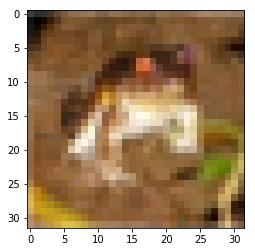

In [54]:
# Plot the 0-th image (a frog)
%matplotlib inline
img = Image.fromarray(X_train[0,:,:,:])
plt.imshow(img)

In [55]:
import requests
import io
from zipfile import ZipFile

# Get/read zip file
zip_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'
r = requests.get(zip_url)
z = ZipFile(io.BytesIO(r.content))
file = z.read('SMSSpamCollection')
# Format Data
text_data = file.decode()
text_data = text_data.encode('ascii',errors='ignore')
text_data = text_data.decode().split('\n')
text_data = [x.split('\t') for x in text_data if len(x)>=1]
[text_data_target, text_data_train] = [list(x) for x in zip(*text_data)]
print(len(text_data_train))
print(set(text_data_target))
print(text_data_train[1])

5574
{'spam', 'ham'}
Ok lar... Joking wif u oni...


In [ ]:
# https://www.cs.cornell.edu/people/pabo/movie-review-data/
import requests
import io
import tarfile

movie_data_url = 'http://www.cs.cornell.edu/people/pabo/movie-review-data/rt-polaritydata.tar.gz'
r = requests.get(movie_data_url)
# Stream data into temp object
stream_data = io.BytesIO(r.content)
tmp = io.BytesIO()
while True:
    s = stream_data.read(16384)
    if not s:  
        break
    tmp.write(s)
stream_data.close()
tmp.seek(0)
# Extract tar file
tar_file = tarfile.open(fileobj=tmp, mode="r:gz")
pos = tar_file.extractfile('rt-polaritydata/rt-polarity.pos')
neg = tar_file.extractfile('rt-polaritydata/rt-polarity.neg')
# Save pos/neg reviews
pos_data = []
for line in pos:
    pos_data.append(line.decode('ISO-8859-1').encode('ascii',errors='ignore').decode())
neg_data = []
for line in neg:
    neg_data.append(line.decode('ISO-8859-1').encode('ascii',errors='ignore').decode())
tar_file.close()

print(len(pos_data))
print(len(neg_data))
print(neg_data[0])

In [ ]:
# English-German Sentence Translation Data
import requests
import io
from zipfile import ZipFile
sentence_url = 'http://www.manythings.org/anki/deu-eng.zip'
r = requests.get(sentence_url)
z = ZipFile(io.BytesIO(r.content))
file = z.read('deu.txt')
# Format Data
eng_ger_data = file.decode()
eng_ger_data = eng_ger_data.encode('ascii',errors='ignore')
eng_ger_data = eng_ger_data.decode().split('\n')
eng_ger_data = [x.split('\t') for x in eng_ger_data if len(x)>=1]
[english_sentence, german_sentence] = [list(x) for x in zip(*eng_ger_data)]
print(len(english_sentence))
print(len(german_sentence))
print(eng_ger_data[10])

# Additional Resources

### Official Resources:

 - [TensorFlow Python API](https://www.tensorflow.org/api_docs/python/)
 - [TensorFlow on Github](https://github.com/tensorflow/tensorflow)
 - [TensorFlow Tutorials](https://www.tensorflow.org/tutorials/)
 - [Udacity Deep Learning Class](https://www.udacity.com/course/deep-learning--ud730)
 - [TensorFlow Playground](http://playground.tensorflow.org/)

### Github Tutorials and Examples:

 - [Tutorials by pkmital](https://github.com/pkmital/tensorflow_tutorials)
 - [Tutorials by nlintz](https://github.com/nlintz/TensorFlow-Tutorials)
 - [Examples by americdamien](https://github.com/aymericdamien/TensorFlow-Examples)
 - [TensorFlow Workshop by amygdala](https://github.com/amygdala/tensorflow-workshop)

### Deep Learning Resources

 - [Efficient Back Prop by Yann LeCun, et. al.](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf)
 - [Online Deep Learning Book, MIT Press](http://www.deeplearningbook.org/)
 - [An Overview of Gradient Descent Algorithms by Sebastian Ruder](http://sebastianruder.com/optimizing-gradient-descent/)
 - [Stochastic Optimization by John Duchi, et. al.](http://www.jmlr.org/papers/volume12/duchi11a/duchi11a.pdf)
 - [ADADELTA Method by Matthew Zeiler](http://arxiv.org/abs/1212.5701)
 - [A Friendly Introduction to Cross-Entropy Loss by Rob DiPietro](http://rdipietro.github.io/friendly-intro-to-cross-entropy-loss/)


### Additional Resources

 - [A Curated List of Dedicated TensorFlow Resources](https://github.com/jtoy/awesome-tensorflow/)

### Arxiv Papers

 - [TensorFlow: Large-Scale Machine Learning on Heterogeneous Distributed Systems](http://arxiv.org/abs/1603.04467)
 - [TensorFlow: A system for large-scale machine learning](http://arxiv.org/abs/1605.08695)
 - [Distributed TensorFlow with MPI](https://arxiv.org/abs/1603.02339)
 - [Comparative Study of Deep Learning Software Frameworks](https://arxiv.org/abs/1511.06435)
 - [Wide & Deep Learning for Recommender Systems](https://arxiv.org/abs/1606.07792)